**Import Pandas to load the CSV file from your computer**

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
upload = files.upload()

Saving delaware_anomaly.csv to delaware_anomaly.csv


**Here the Delaware Anomaly dataset has been used which is a public dataset**

In [ ]:
import io 
  
data = pd.read_csv(io.BytesIO(upload['delaware_anomaly.csv'])) 
print(data)

       FISCAL_YEAR  FISCAL_PERIOD  ...    TRANS_DT MERCHANDISE_AMT
0             2015              1  ...    6/3/2014           -5.50
1             2015              1  ...   6/26/2014           18.31
2             2015              1  ...   6/26/2014           21.61
3             2015              1  ...   6/26/2014           22.39
4             2015              1  ...   6/26/2014            5.44
...            ...            ...  ...         ...             ...
15151         2020              6  ...  12/12/2019           52.58
15152         2020              6  ...  12/13/2019           14.91
15153         2020              6  ...  12/13/2019          111.00
15154         2020              6  ...   12/5/2019           99.99
15155         2020              6  ...   12/9/2019           99.99

[15156 rows x 8 columns]


**Check the dataframe's top 5 rows**

In [ ]:
data.head()

,FISCAL_YEAR,FISCAL_PERIOD,DEPT_NAME,DIV_NAME,MERCHANT,CAT_DESCR,TRANS_DT,MERCHANDISE_AMT
0,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,DOUBLETREE HOTELS WASHING,LODGING,6/3/2014,-5.50
1,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2014,18.31
2,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2014,21.61
3,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2014,22.39
4,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2014,5.44


**Have a look at the data shape and data types**

In [ ]:
data.shape

(15156, 8)

In [ ]:
data.dtypes

FISCAL_YEAR          int64
FISCAL_PERIOD        int64
DEPT_NAME           object
DIV_NAME            object
MERCHANT            object
CAT_DESCR           object
TRANS_DT            object
MERCHANDISE_AMT    float64
dtype: object

**You can also check Value Counts for different categories**

In [ ]:
data['MERCHANT'].value_counts()

WB MASON                     293
AMAZON.COM                   211
VZWRLSS*IVR VB               166
AMAZON MKTPLACE PMTS         163
USPS PO 0917600901           157
                            ... 
UPS*1Z21X9560390697742         1
AMZN MKTP US*M837V4ZZ0         1
CHINA SPROUT                   1
TST* TARTINE BAKERY - SAN      1
REGGIO'S CONNECT ORD           1
Name: MERCHANT, Length: 5802, dtype: int64

**Checking if System has Pycaret installed, if not it will be installed using Pip**

In [ ]:
import sys
!{sys.executable} -m pip install pycaret 

     |████████████████████████████████| 266kB 8.7MB/s 
     |████████████████████████████████| 1.7MB 14.3MB/s 
     |████████████████████████████████| 276kB 46.0MB/s 
     |████████████████████████████████| 1.8MB 49.3MB/s 
     |████████████████████████████████| 102kB 12.8MB/s 
     |████████████████████████████████| 6.8MB 57.2MB/s 
     |████████████████████████████████| 245kB 52.5MB/s 
     |████████████████████████████████| 215kB 51.4MB/s 
     |████████████████████████████████| 14.2MB 249kB/s 
     |████████████████████████████████| 61kB 11.1MB/s 
     |████████████████████████████████| 604kB 45.1MB/s 
     |████████████████████████████████| 81kB 11.7MB/s 
     |████████████████████████████████| 3.1MB 49.2MB/s 
     |████████████████████████████████| 81kB 12.9MB/s 
     |████████████████████████████████| 61kB 9.5MB/s 
     |████████████████████████████████| 1.1MB 45.1MB/s 
     |████████████████████████████████| 81kB 13.4MB/s 
     |████████████████████████████████| 163kB 62.4MB/s 

**While setting up the model, the columns are one hot encoded. This results in a lot of unnecessary columns**

**Hence, Category is ignored as it is a Text field. Merchant has high cardinality. Fiscal Year and Period are declared as Numeric**

In [ ]:
from pycaret.anomaly import *
s = setup(data, session_id = 123,
          ignore_features = ['CAT_DESCR'],
          high_cardinality_features= ['MERCHANT'],
          numeric_features = ['FISCAL_YEAR', 'FISCAL_PERIOD' ])

,Description,Value
0,session_id,123
1,Original Data,"(15156, 8)"
2,Missing Values,False
3,Numeric Features,3
4,Categorical Features,3
5,Ordinal Features,False
6,High Cardinality Features,True
7,High Cardinality Method,frequency
8,Transformed Data,"(15156, 53)"
9,CPU Jobs,-1


**In the above output, for Transformed data, you can see - Transformed Data	(15156, 53). This means that Pycaret has one hot encoded only 53 additional columns.**

In [ ]:
get_config('X')

,FISCAL_YEAR,FISCAL_PERIOD,MERCHANT,MERCHANDISE_AMT,DEPT_NAME_DEPT OF EDUCATION,DIV_NAME_ADVISORY COUNCIL,DIV_NAME_Academic Support,DIV_NAME_Adult Education and Work Force,DIV_NAME_DEPARTMENT OF EDUCATION,DIV_NAME_DRIVER TRAINING,DIV_NAME_Department of Education,DIV_NAME_Driver Training,DIV_NAME_E Education Block Grants,DIV_NAME_E Transportation,DIV_NAME_EDUCATION BLOCK GRANTS,DIV_NAME_Education Block Grants,DIV_NAME_Educator Support,DIV_NAME_OTHER ITEMS,DIV_NAME_Office of Early Learning,DIV_NAME_Office of the Secretary,DIV_NAME_Operations Support,DIV_NAME_Other Items,DIV_NAME_Professional Standards Board,DIV_NAME_Public School Transportation,DIV_NAME_SPECIAL NEEDS PROGRAMS,DIV_NAME_Special Needs Programs,DIV_NAME_State Board of Education,DIV_NAME_Student Support,DIV_NAME_TRANSPORTATION,DIV_NAME_Transportation,TRANS_DT_month_1,TRANS_DT_month_10,TRANS_DT_month_11,TRANS_DT_month_12,TRANS_DT_month_2,TRANS_DT_month_3,TRANS_DT_month_4,TRANS_DT_month_5,TRANS_DT_month_6,TRANS_DT_month_7,TRANS_DT_month_8,TRANS_DT_month_9,TRANS_DT_weekday_0,TRANS_DT_weekday_1,TRANS_DT_weekday_2,TRANS_DT_weekday_3,TRANS_DT_weekday_4,TRANS_DT_weekday_5,TRANS_DT_weekday_6,TRANS_DT_is_month_end_0,TRANS_DT_is_month_end_1,TRANS_DT_is_month_start_0,TRANS_DT_is_month_start_1
0,2015.0,1.0,1.0,-5.500000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2015.0,1.0,4.0,18.309999,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2015.0,1.0,4.0,21.610001,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,2015.0,1.0,4.0,22.389999,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,2015.0,1.0,4.0,5.440000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15151,2020.0,6.0,7.0,52.580002,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
15152,2020.0,6.0,16.0,14.910000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
15153,2020.0,6.0,16.0,111.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
15154,2020.0,6.0,2.0,99.989998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


**You can also check the name of the columns encoded**

In [ ]:
get_config('X').columns

Index(['FISCAL_YEAR', 'FISCAL_PERIOD', 'MERCHANT', 'MERCHANDISE_AMT',
       'DEPT_NAME_DEPT OF EDUCATION', 'DIV_NAME_ADVISORY COUNCIL',
       'DIV_NAME_Academic Support', 'DIV_NAME_Adult Education and Work Force',
       'DIV_NAME_DEPARTMENT OF EDUCATION', 'DIV_NAME_DRIVER TRAINING',
       'DIV_NAME_Department of Education', 'DIV_NAME_Driver Training',
       'DIV_NAME_E Education Block Grants', 'DIV_NAME_E Transportation',
       'DIV_NAME_EDUCATION BLOCK GRANTS', 'DIV_NAME_Education Block Grants',
       'DIV_NAME_Educator Support', 'DIV_NAME_OTHER ITEMS',
       'DIV_NAME_Office of Early Learning', 'DIV_NAME_Office of the Secretary',
       'DIV_NAME_Operations Support', 'DIV_NAME_Other Items',
       'DIV_NAME_Professional Standards Board',
       'DIV_NAME_Public School Transportation',
       'DIV_NAME_SPECIAL NEEDS PROGRAMS', 'DIV_NAME_Special Needs Programs',
       'DIV_NAME_State Board of Education', 'DIV_NAME_Student Support',
       'DIV_NAME_TRANSPORTATION', 'DIV_NAME_T

**Similarly, we create and assign an iForest model to r**

In [ ]:
iforest = create_model('iforest')
r = assign_model(iforest)
r.head()

,FISCAL_YEAR,FISCAL_PERIOD,DEPT_NAME,DIV_NAME,MERCHANT,CAT_DESCR,TRANS_DT,MERCHANDISE_AMT,Anomaly,Anomaly_Score
0,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,DOUBLETREE HOTELS WASHING,LODGING,6/3/2014,-5.50,0,-0.081450
1,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2014,18.31,0,-0.071574
2,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2014,21.61,0,-0.071574
3,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2014,22.39,0,-0.071574
4,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2014,5.44,0,-0.071310


**Checking the distribution of Anomalies using the Score**

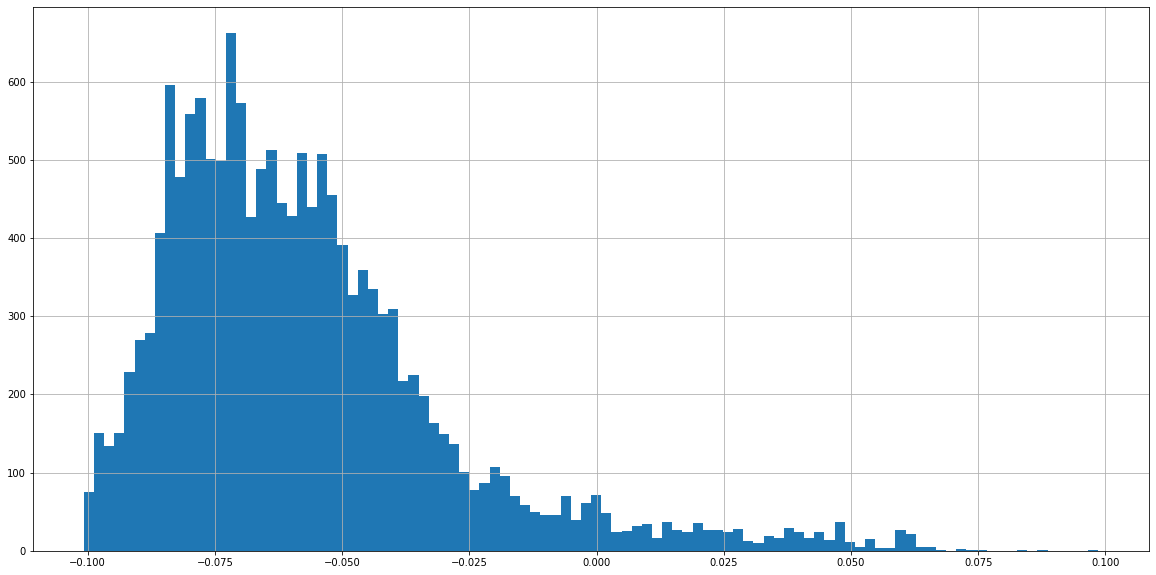

In [ ]:
r['Anomaly_Score'].hist(bins = 100, figsize = (20, 10))

**Plotting an anomaly visual to see how Pycarte predicted the outliers**

In [ ]:
plot_model(iforest, plot = 'umap')